# Автоматическая обработка текста искуственными нейронными сетями

## Задачи

Приведем примеры стандартных задач автоматической обработки текста. Для удобства разделим их на 3 категории по "сложности". Конечно, существуют и другие классификации.

1. Задачи, связанные с лингвистикой. 
    - частеречная разметка (part of speach tagging); разметить в тексте части речи
    - морфологическая сегментация (morphological segmentation); разбить слова на морфемы.
    - стемминг (stemming); выделение основы слова.
    - лемматизация (lemmatization); поставить слова в словарную форму.
    - выделение границ предложения (sentence boundary disambligation) и пословная сегментация (word segmentation);
    - распознавание именнованных сущностей (named entity recognition); найти в тексте имена, названия городов, стран, компаний и пр.
    - разрешение смысла слов (word sense disambligation); выбрать значение слова среди омонимов.
    - синтаксический парсинг (syntactic parsing); построить синаксическое дерево.
    - разрешением кореференций (coreferece resolution); определить, к каким объектам или словам относится данное слово.


2. Задачи, требующие некоторого понимания текста.
    - языковые модели (language models); по отрывку текста предсказать следующее слово, важно для распознавания речи.
    - информационный поиск (informational retrieval); найти наиболее релевантный текст по заданному запросу.
    - анализ тональности (sentiment analysis); определить по тексту его тональность.
    - выделение отношений или фактов (relationship extraction, fact extraction); выделить из текста хорошо определенные отношения или факты.
    - ответы на вопросы (question answering); дать ответ на заданный вопрос: классификация или порождения небольшого текста.


3. Задачи порождения текста.
    - порождение текста (text generation).
    - автоматическое реферирование (automatic summarization); написать краткое содержание текста, summary.
    - машинный перевод (machine translation).
    - диалоговые модели (dialog and conversational models).

## Метрики оценки качества текста

Как оценить правильность порожденного текста?

- BLEU (Bilingual Evaluation Understudy)
- TER (Translation Edit Rate)
- ROUGE
- LEPOR
- METEOR

## Простой пример: Bag of words

In [1]:
import numpy
from tensorflow.keras.datasets import imdb
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

from tensorflow.keras.preprocessing import sequence

In [2]:
top_words = 5000
max_review_length = 500
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=top_words)

<__array_function__ internals>:5: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
D:\Users\maxim\Anaconda3\envs\deep_learning\lib\site-packages\tensorflow\python\keras\datasets\imdb.py:159: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
D:\Users\maxim\Anaconda3\envs\deep_learning\lib\site-packages\tensorflow\python\keras\datasets\imdb.py:160: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths 

In [3]:
X_train.shape

(25000,)

In [4]:
def get_words(sentences, words=[]):
    for sentence in sentences:
        words.extend(sentence)
        words = sorted(list(set(words)))
    return words

In [5]:
words = get_words(X_train)
words = get_words(X_test, words)
print(len(words))

4998


In [6]:
word_index = imdb.get_word_index() # get {word : index}
index_word = {v : k for k,v in word_index.items()} # get {index : word}
index_word.update({0 : ""})

index = 1
print(" ".join([index_word[idx] for idx in X_train[index]]))
print("positive" if y_train[index]==1 else "negative")

the thought solid thought and do making to is spot nomination and while he of jack in where picked as getting on was did hands fact characters to always life thrillers not as me can't in at are br of sure your way of little it strongly random to view of love it so and of guy it used producer of where it of here icon film of outside to don't all unique some like of direction it if out her imagination below keep of queen he and to makes this stretch and of solid it thought begins br and and budget worthwhile though ok and and for ever better were and and for budget look kicked any to of making it out and follows for effects show to show cast this family us scenes more it severe making and to and finds tv tend to of and these thing wants but and an and cult as it is video do you david see scenery it in few those are of ship for with of wild to one is very work dark they don't do dvd with those them
negative


In [9]:
from nltk.stem import WordNetLemmatizer

# import these modules
lemmatizer = WordNetLemmatizer()
  
print("rocks :", lemmatizer.lemmatize("rocks"))
print("corpora :", lemmatizer.lemmatize("corpora"))
  
# a denotes adjective in "pos"
print("better :", lemmatizer.lemmatize("better"))

rocks : rock
corpora : corpus
better : better


In [10]:
from nltk.stem import WordNetLemmatizer


def get_words_lem(sentences, words=[]):
    lemmatizer = WordNetLemmatizer()
    
    for sentence in sentences:
        lemmatized_sentence = []
        for word in sentence:
            lemma = lemmatizer.lemmatize(index_word[word])
            lemmatized_sentence.append(lemma)
        words.extend(lemmatized_sentence)
        words = sorted(list(set(words)))
    return words

In [12]:
words = get_words_lem(X_train)
words = get_words_lem(X_test, words)
print(len(words))

4458


In [ ]:
print(X_train[0][:20])

In [13]:
def lemmatized_bow(sentences, words):
    bow = numpy.zeros((len(sentences), len(words)))
    for i in range(len(sentences)):
        for word in sentences[i]:
            lemma = lemmatizer.lemmatize(index_word[word])
            idx = words.index(lemma)
            bow[i][idx] += 1
    return bow

In [17]:
X_train_bow = lemmatized_bow(X_train, words)
X_test_bow = lemmatized_bow(X_test, words)

In [18]:
X_train_bow.shape

(25000, 4458)

#### Модель

In [31]:
model = Sequential([
    Dense(128, input_shape=(len(words),), activation='relu'),
    Dropout(0.5),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')
])
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
history = model.fit(
    X_train_bow, 
    y_train, 
    epochs=5, 
    batch_size=128, 
)

Epoch 1/5
196/196 [==============================] - 1s 2ms/step - loss: 0.4701 - accuracy: 0.7787
Epoch 2/5
196/196 [==============================] - 0s 2ms/step - loss: 0.2124 - accuracy: 0.9211
Epoch 3/5
196/196 [==============================] - 0s 2ms/step - loss: 0.1282 - accuracy: 0.9517
Epoch 4/5
196/196 [==============================] - 0s 2ms/step - loss: 0.0559 - accuracy: 0.9825
Epoch 5/5
196/196 [==============================] - 0s 2ms/step - loss: 0.0175 - accuracy: 0.9954


In [32]:
test_loss, test_acc = model.evaluate(X_test_bow, y_test, verbose=2)
print('\nТочность на проверочных данных:', test_acc)

782/782 - 1s - loss: 0.6100 - accuracy: 0.8622

Точность на проверочных данных: 0.8622400164604187


## Gensim: триграммы, word2vec

In [21]:
from gensim.corpora.wikicorpus import WikiCorpus
wiki = WikiCorpus('ruwiki-20201220-pages-articles-multistream1.xml-p1p224167.bz2', dictionary=False)

el = wiki.get_texts().__next__() # Получить первый элемент генератора
print(el[:20])

D:\Users\maxim\Anaconda3\envs\deep_learning\lib\site-packages\gensim\utils.py:1268: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected %s; aliasing chunkize to chunkize_serial" % entity)


['литва', 'официальное', 'название', 'лито', 'вская', 'респу', 'блика', 'государство', 'расположенное', 'северной', 'части', 'европы', 'площадь', 'км²', 'протяжённость', 'севера', 'на', 'юг', 'км', 'запада']


In [22]:
from gensim.models.phrases import Phrases, Phraser
bigram = Phrases(wiki.get_texts())
bigram_transformer = Phraser(bigram)

In [25]:
def text_generator_bigram():
    for text in wiki.get_texts():
        yield bigram_transformer[ [ word for word in text] ]

In [28]:
examples = 1
for el in text_generator_bigram():
    print(el[:20])
    examples -= 1
    if examples <= 0:
        break

['литва', 'официальное_название', 'лито_вская', 'респу_блика', 'государство_расположенное', 'северной_части', 'европы', 'площадь_км²', 'протяжённость_севера', 'на_юг', 'км_запада', 'на_восток', 'км', 'население_составляет', 'человек', 'сентябрь', 'занимает_место', 'мире', 'по_численности', 'населения']


In [31]:
trigram = Phrases(text_generator_bigram())
trigram_transformer = Phraser(trigram)

In [32]:
def text_generator_trigram():
    for text in wiki.get_texts():
        yield trigram_transformer[ bigram_transformer[  [word for word in text] ] ]

In [ ]:
from gensim.models.word2vec import Word2Vec
model = Word2Vec(size=100, window=7, min_count=10, workers=10)
model.build_vocab(text_generator_trigram())

In [44]:
model.train(text_generator_trigram(), total_examples=model.corpus_count, epochs=1)

(38754848, 45017532)

In [56]:
model.save("word2vec.model")

In [48]:
from gensim.models.word2vec import Word2Vec
model = Word2Vec.load("word2vec.model")

In [49]:
model.wv.most_similar('машина_времени')

[('крематорий', 0.9801654815673828),
 ('лучшие_песни', 0.980141282081604),
 ('трибьют', 0.9800820350646973),
 ('хит', 0.9794871211051941),
 ('альбом_группы', 0.9782088398933411),
 ('калейдоскоп', 0.9775331616401672),
 ('полнометражного', 0.9769081473350525),
 ('году_был_выпущен', 0.9765214920043945),
 ('песен_группы', 0.9758527278900146),
 ('приквел', 0.9751590490341187)]

In [13]:
model.wv.most_similar('нейронные_сети')

[('поведенческие', 0.9747592210769653),
 ('диагностика', 0.9740830659866333),
 ('функциональные', 0.9739323854446411),
 ('структурные', 0.9730919599533081),
 ('дискретные', 0.9727703332901001),
 ('алгоритмы', 0.972390353679657),
 ('подсистемы', 0.972325325012207),
 ('оптические', 0.9720180034637451),
 ('векторные', 0.9719081521034241),
 ('семантических', 0.9718116521835327)]

### Векторная алгебра
*король + женщина - мужчина =*

In [42]:
vector = model.wv[u'париж'] +  model.wv[u'россия'] - model.wv[u'франция']
model.wv.similar_by_vector(vector, topn=10, restrict_vocab=None)

[('газета', 0.8673749566078186),
 ('могут_короли', 0.8527016639709473),
 ('московская_правда', 0.8360667824745178),
 ('ооо_студия', 0.8272526264190674),
 ('документальный_фильм', 0.8246611952781677),
 ('хихоне', 0.823471188545227),
 ('русская_жизнь', 0.8226134181022644),
 ('москва', 0.815395176410675),
 ('моя_семья', 0.8153678178787231),
 ('первый_канал', 0.8142729997634888)]

## Загрузка обученной модели

In [50]:
import gensim.downloader as api

In [ ]:
import json
info = api.info()
# print(json.dumps(info, indent=4))

In [52]:
model_word2vec_rus = api.load("word2vec-ruscorpora-300")

In [53]:
model_word2vec_rus.most_similar(u'идти_VERB')

[('пойти_VERB', 0.7285876274108887),
 ('брести_VERB', 0.5698232650756836),
 ('плестись_VERB', 0.5263214111328125),
 ('шагать_VERB', 0.5238106846809387),
 ('тащиться_VERB', 0.5215544104576111),
 ('бежать_VERB', 0.521239161491394),
 ('двигаться_VERB', 0.5206477642059326),
 ('шествовать_VERB', 0.5173883438110352),
 ('двинуться_VERB', 0.5140303373336792),
 ('ехать_VERB', 0.5131384134292603)]

### Векторная алгебра
*король + женщина - мужчина =*

In [29]:
vector = model_word2vec_rus[u'москва_NOUN'] +  model_word2vec_rus[u'франция_NOUN'] - model_word2vec_rus[u'россия_NOUN']
model_word2vec_rus.similar_by_vector(vector, topn=10, restrict_vocab=None)

[('париж_NOUN', 0.714914083480835),
 ('москва_NOUN', 0.6828794479370117),
 ('франция_NOUN', 0.6285260319709778),
 ('берлин_NOUN', 0.5847430229187012),
 ('лондон_NOUN', 0.583754301071167),
 ('италия_NOUN', 0.5666607618331909),
 ('кольмар_NOUN', 0.5666133165359497),
 ('лион_NOUN', 0.5562111139297485),
 ('флоренция_NOUN', 0.5482500791549683),
 ('симплона_NOUN', 0.5437489748001099)]

In [30]:
vector = model_word2vec_rus[u'король_NOUN'] +  model_word2vec_rus[u'женщина_NOUN'] - model_word2vec_rus[u'мужчина_NOUN']
model_word2vec_rus.similar_by_vector(vector, topn=10, restrict_vocab=None)

[('король_NOUN', 0.880538821220398),
 ('королева_NOUN', 0.7313904166221619),
 ('герцог_NOUN', 0.6502389311790466),
 ('принцесса_NOUN', 0.6266285181045532),
 ('герцогиня_NOUN', 0.6240381002426147),
 ('королевство_NOUN', 0.6094207167625427),
 ('зюдерманландский_ADJ', 0.6084389686584473),
 ('дурлахский_ADJ', 0.6081665754318237),
 ('ульрик::элеонора_NOUN', 0.6073107123374939),
 ('максимилианов_NOUN', 0.6057004332542419)]

## Пример: распознавание спама

Первым делом нужно загрузить датасет. Воспользуемся [следующей задачей с Kaggle](https://www.kaggle.com/team-ai/spam-text-message-classification). Поместите файл "SPAM text message 20170820 - Data.csv" в папку с ноутбуком.

## Пример обработки текста с помощью GRU

### Предоработка данных

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


from tensorflow.keras.layers import Embedding, Dense, GRU
from tensorflow.keras.models import Sequential

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [4]:
data = pd.read_csv("SPAM text message 20170820 - Data.csv")
texts = []
labels = []
for i, label in enumerate(data['Category']):
    texts.append(data['Message'][i])
    if label == 'ham':
        labels.append(0)
    else:
        labels.append(1)

texts = np.asarray(texts)
labels = np.asarray(labels)


print("number of texts :" , len(texts))
print("number of labels: ", len(labels))

number of texts : 5572
number of labels:  5572


In [5]:
# number of words used as features
max_features = 10000
# cut off the words after seeing 500 words in each document(email)
maxlen = 500

# we will use 80% of data as training, 20% as validation data
training_samples = int(len(texts) * 0.8)
validation_samples = len(texts) - training_samples
# sanity check
print(len(texts) == (training_samples + validation_samples))
print("The number of training {0}, validation {1} ".format(training_samples, validation_samples))

True
The number of training 4457, validation 1115 
Found 9004 unique words: 
data shape:  (5572, 500)


In [ ]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)

word_index = tokenizer.word_index
print("Found {0} unique words: ".format(len(word_index)))

data = pad_sequences(sequences, maxlen=maxlen)

print("data shape: ", data.shape)

In [ ]:
# shuffle data
indices = np.arange(data.shape[0])
np.random.shuffle(indices)
data = data[indices]
labels = labels[indices]

texts_train = data[:training_samples]
y_train = labels[:training_samples]
texts_test = data[training_samples:]
y_test = labels[training_samples:]

### Обучение модели и вывод результатов

In [6]:
model = Sequential()
model.add(Embedding(max_features, 32))
#model.add(GRU(32,return_sequences=True))
model.add(GRU(32))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])

In [7]:
history_gru = model.fit(texts_train, y_train, epochs=10, batch_size=60, validation_split=0.2)

Epoch 1/10
60/60 [==============================] - 12s 34ms/step - loss: 0.4584 - acc: 0.8328 - val_loss: 0.1541 - val_acc: 0.9720
Epoch 2/10
60/60 [==============================] - 2s 28ms/step - loss: 0.1014 - acc: 0.9755 - val_loss: 0.0663 - val_acc: 0.9809
Epoch 3/10
60/60 [==============================] - 1s 23ms/step - loss: 0.0404 - acc: 0.9913 - val_loss: 0.0418 - val_acc: 0.9843
Epoch 4/10
60/60 [==============================] - 1s 24ms/step - loss: 0.0261 - acc: 0.9923 - val_loss: 0.0397 - val_acc: 0.9832
Epoch 5/10
60/60 [==============================] - 1s 20ms/step - loss: 0.0207 - acc: 0.9954 - val_loss: 0.0448 - val_acc: 0.9832
Epoch 6/10
60/60 [==============================] - 1s 18ms/step - loss: 0.0078 - acc: 0.9983 - val_loss: 0.0481 - val_acc: 0.9798
Epoch 7/10
60/60 [==============================] - 1s 20ms/step - loss: 0.0048 - acc: 0.9991 - val_loss: 0.0517 - val_acc: 0.9821
Epoch 8/10
60/60 [==============================] - 1s 19ms/step - loss: 0.0036 - 

In [ ]:
def show_loss(history):
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs = range(1, len(loss) + 1)
    plt.plot(epochs, loss, 'bo', label='Training loss')
    plt.plot(epochs, val_loss, 'b', label='Validation loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend(['Train', 'Test'], loc='upper left')

    plt.show()

    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='upper left')
    plt.show()

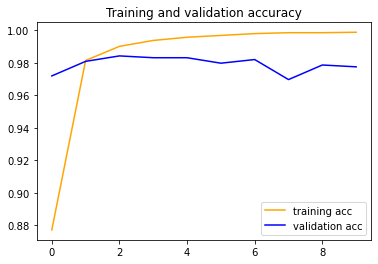

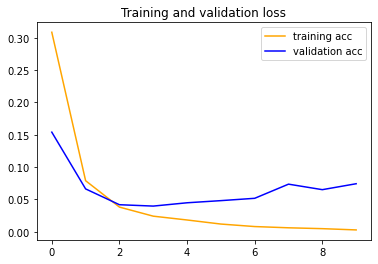

In [8]:
show_loss(history_gru)

### Проверка результата

In [12]:
acc = model.evaluate(texts_test, y_test)


from sklearn.metrics import confusion_matrix
print("Test loss is {0:.2f} accuracy is {1:.2f}  ".format(acc[0],acc[1]))
print(confusion_matrix(pred, y_test))

35/35 [==============================] - 0s 9ms/step - loss: 0.0654 - acc: 0.9812
Test loss is 0.07 accuracy is 0.98  
[[952  12]
 [  9 142]]


### Использование

In [38]:
a=29
print(texts[training_samples+a])
pre=model.predict(texts_test)
print(np.argmax(pre[a]))

Wait that's still not all that clear, were you not sure about me being sarcastic or that that's why x doesn't want to live with us
0


## LSTM

In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras.layers import Embedding, Dense, LSTM
from tensorflow.keras.models import Sequential

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [40]:
data = pd.read_csv("SPAM text message 20170820 - Data.csv")
texts = []
labels = []
for i, label in enumerate(data['Category']):
    texts.append(data['Message'][i])
    if label == 'ham':
        labels.append(0)
    else:
        labels.append(1)

texts = np.asarray(texts)
labels = np.asarray(labels)
labels_test=labels
print("number of texts :" , len(texts))
print("number of labels: ", len(labels))

# number of words used as features
max_features = 10000
# cut off the words after seeing 500 words in each document(email)
maxlen = 500


# we will use 80% of data as training, 20% as validation data
training_samples = int(5572 * .8)
validation_samples = int(5572 - training_samples)
# sanity check
print(len(texts) == (training_samples + validation_samples))
print("The number of training {0}, validation {1} ".format(training_samples, validation_samples))

tokenizer = Tokenizer()
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)

word_index = tokenizer.word_index
print("Found {0} unique words: ".format(len(word_index)))

data = pad_sequences(sequences, maxlen=maxlen)
data_test=data


np.random.seed(42)
# shuffle data
indices = np.arange(data.shape[0])
np.random.shuffle(indices)
data = data[indices]
labels = labels[indices]

#share data
texts_train = data[:training_samples]
y_train = labels[:training_samples]
texts_test = data[training_samples:]
y_test = labels[training_samples:]

number of texts : 5572
number of labels:  5572
True
The number of training 4457, validation 1115 
Found 9004 unique words: 


In [41]:
model = Sequential()
model.add(Embedding(max_features, 32))
model.add(LSTM(32,return_sequences=True))
model.add(LSTM(32))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])

In [ ]:
def show_loss(history):
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs = range(1, len(loss) + 1)
    plt.plot(epochs, loss, 'bo', label='Training loss')
    plt.plot(epochs, val_loss, 'b', label='Validation loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend(['Train', 'Test'], loc='upper left')

    plt.show()

    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='upper left')
    plt.show()

Epoch 1/30
60/60 [==============================] - 3s 46ms/step - loss: 2.9271e-04 - acc: 1.0000 - val_loss: 0.1396 - val_acc: 0.9776
Epoch 2/30
60/60 [==============================] - 3s 50ms/step - loss: 2.2817e-04 - acc: 1.0000 - val_loss: 0.1522 - val_acc: 0.9787
Epoch 3/30
60/60 [==============================] - 2s 31ms/step - loss: 0.0521 - acc: 0.9916 - val_loss: 0.2053 - val_acc: 0.9731
Epoch 4/30
60/60 [==============================] - 2s 41ms/step - loss: 0.0040 - acc: 0.9994 - val_loss: 0.1735 - val_acc: 0.9765
Epoch 5/30
60/60 [==============================] - 2s 37ms/step - loss: 0.0025 - acc: 0.9994 - val_loss: 0.1553 - val_acc: 0.9720
Epoch 6/30
60/60 [==============================] - 2s 34ms/step - loss: 5.1370e-05 - acc: 1.0000 - val_loss: 0.1687 - val_acc: 0.9720
Epoch 7/30
60/60 [==============================] - 3s 45ms/step - loss: 5.0842e-05 - acc: 1.0000 - val_loss: 0.1679 - val_acc: 0.9753
Epoch 8/30
60/60 [==============================] - 3s 47ms/step - 

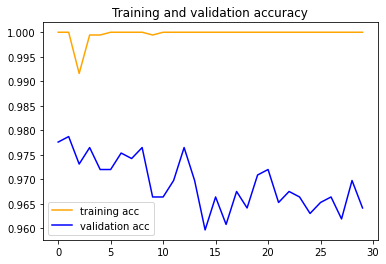

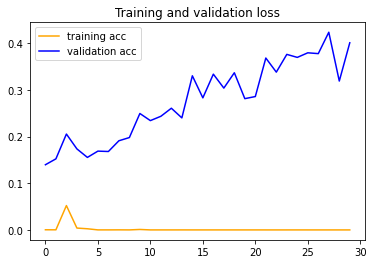

In [51]:
history_ltsm = model.fit(texts_train, y_train, epochs=30, batch_size=60, validation_split=0.2)

show_loss(history_ltsm)

In [52]:
acc = model.evaluate(texts_test, y_test)

from sklearn.metrics import confusion_matrix
print("Test loss is {0:.2f} accuracy is {1:.2f}  ".format(acc[0],acc[1]))
print(confusion_matrix(pred, y_test))

35/35 [==============================] - 0s 12ms/step - loss: 0.3776 - acc: 0.9668
Test loss is 0.38 accuracy is 0.97  
[[952  12]
 [  9 142]]


### Использование

In [59]:
pre=model.predict(texts_test)

In [70]:
i = 0
for el in pre:
    if el == 1:
        print(i, end=' ')
    i+=1

10 15 27 61 79 87 97 101 107 113 133 138 148 184 185 203 227 230 237 245 255 257 270 287 293 308 338 361 364 370 371 380 416 420 428 430 465 466 467 482 491 518 530 532 538 546 558 561 581 600 606 614 620 630 647 656 660 673 676 680 718 724 729 769 774 791 800 805 813 818 830 831 840 856 864 865 891 901 904 907 912 928 938 939 940 952 954 963 968 969 970 971 991 1001 1025 1031 1043 1058 1062 1074 1079 1080 1089 1109 

In [75]:
a=64
print (texts[training_samples+a])
print("Predicted:", np.argmax(pre[a]), "True:", y_test[a])

What to think no one saying clearly. Ok leave no need to ask her. I will go if she come or not
Predicted: 0 True: 0


# Встраивание GloVe в keras.layers.Embedding

Вы можете использовать обученную модель GloVe в модели keras, встроив её в Embedding. 
https://keras.io/examples/nlp/pretrained_word_embeddings/

# Ссылки
- Николенко "Глубокое обучение"
- https://webdevblog.ru/gensim-rukovodstvo-dlya-nachinajushhih/
- https://code.google.com/archive/p/word2vec/